In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_json('transactions.txt', lines=True)
df.head(5)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,,0.0,,,,False,,,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,,0.0,,,,True,,,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,,0.0,,,,True,,,False,False


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  int64  
 1   customerId                786363 non-null  int64  
 2   creditLimit               786363 non-null  int64  
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                786363 non-null  object 
 8   merchantCountryCode       786363 non-null  object 
 9   posEntryMode              786363 non-null  object 
 10  posConditionCode          786363 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

In [40]:
#Drop columns that have only 1 value
cols_drop = ['accountNumber', 'creditLimit', 'availableMoney', 'transactionDateTime', 'merchantName', 'dateOfLastAddressChange', 'accountOpenDate', 'currentExpDate', 'echoBuffer', 'merchantCity', 'merchantState', 'merchantZip', 'posOnPremises', 'recurringAuthInd', 'cardLast4Digits', ]
df = df.drop(columns=cols_drop, axis=1)


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   customerId                786363 non-null  int64  
 1   transactionAmount         786363 non-null  float64
 2   acqCountry                786363 non-null  object 
 3   merchantCountryCode       786363 non-null  object 
 4   posEntryMode              786363 non-null  object 
 5   posConditionCode          786363 non-null  object 
 6   merchantCategoryCode      786363 non-null  object 
 7   cardCVV                   786363 non-null  int64  
 8   enteredCVV                786363 non-null  int64  
 9   transactionType           786363 non-null  object 
 10  currentBalance            786363 non-null  float64
 11  cardPresent               786363 non-null  bool   
 12  expirationDateKeyInMatch  786363 non-null  bool   
 13  isFraud                   786363 non-null  b

In [42]:
#Replace empty strings with 'UNKNOWN'
df = df.replace('', 'UNKNOWN')
#Check if the df still has empty strings
(df == '').any()

customerId                  False
transactionAmount           False
acqCountry                  False
merchantCountryCode         False
posEntryMode                False
posConditionCode            False
merchantCategoryCode        False
cardCVV                     False
enteredCVV                  False
transactionType             False
currentBalance              False
cardPresent                 False
expirationDateKeyInMatch    False
isFraud                     False
dtype: bool

In [43]:
df['isMatchedCVV'] = df['cardCVV'] == df['enteredCVV']
df=df.drop(columns=['enteredCVV', 'cardCVV'], axis=1)

In [44]:
print(df.groupby('posEntryMode')['isFraud'].value_counts(normalize=True).unstack(level=-1))

isFraud          False     True 
posEntryMode                    
02            0.982540  0.017460
05            0.992204  0.007796
09            0.976070  0.023930
80            0.984296  0.015704
90            0.980997  0.019003
UNKNOWN       0.933646  0.066354


In [45]:
print(df.groupby('posConditionCode')['isFraud'].value_counts(normalize=True).unstack(level=-1))

isFraud              False     True 
posConditionCode                    
01                0.983731  0.016269
08                0.987062  0.012938
99                0.969600  0.030400
UNKNOWN           0.946210  0.053790


In [46]:
df.groupby('merchantCategoryCode')['transactionAmount'].describe()

,count,mean,std,min,25%,50%,75%,max
merchantCategoryCode,,,,,,,,
airline,15412.0,144.956619,149.484076,0.0,38.6975,98.460,203.5900,1491.36
auto,21651.0,144.844389,148.873096,0.0,38.4200,98.970,203.8050,1710.13
cable/phone,1382.0,97.288068,35.296735,0.0,69.9400,98.500,125.2075,184.70
entertainment,80098.0,146.041694,150.233520,0.0,38.9725,100.120,203.4475,1562.32
fastfood,112138.0,145.591507,149.858759,0.0,39.0700,99.485,203.0875,1905.30
food,75490.0,145.313906,150.123692,0.0,38.5700,98.680,202.2375,1873.97
food_delivery,6000.0,53.155968,17.201947,0.0,36.9600,51.110,68.8400,82.31
fuel,23910.0,45.180771,15.608603,0.0,34.2425,45.870,56.9400,82.57
furniture,7432.0,144.925686,149.292284,0.0,38.4450,100.120,201.8575,1541.68


In [47]:
print(df.groupby('merchantCategoryCode')['isFraud'].value_counts(normalize=True).unstack(level=-1))

isFraud                  False     True 
merchantCategoryCode                    
airline               0.965352  0.034648
auto                  0.987391  0.012609
cable/phone           1.000000       NaN
entertainment         0.988002  0.011998
fastfood              0.990423  0.009577
food                  0.986568  0.013432
food_delivery         1.000000       NaN
fuel                  1.000000       NaN
furniture             0.986141  0.013859
gym                   1.000000       NaN
health                0.995286  0.004714
hotels                0.992668  0.007332
mobileapps            1.000000       NaN
online_gifts          0.975754  0.024246
online_retail         0.975573  0.024427
online_subscriptions  1.000000       NaN
personal care         0.995465  0.004535
rideshare             0.975125  0.024875
subscriptions         0.990568  0.009432


In [48]:
def map(cat):
  if cat in {'auto', 'entertainment', 'fastfood', 'food', 'furniture', 'health', 'hotels', 'personal care', 'subscriptions'}:
    return 2
  elif cat in {'airline', 'online_gifts', 'online_retail', 'rideshare'}:
    return 3
  else:
    return 1
df['merchantCategoryCode'] = df['merchantCategoryCode'].apply(map)


In [49]:
print(df.groupby('merchantCategoryCode')['isFraud'].value_counts(normalize=True).unstack(level=-1))

isFraud                  False     True 
merchantCategoryCode                    
1                     1.000000       NaN
2                     0.989621  0.010379
3                     0.975070  0.024930


In [63]:
df.groupby('acqCountry')['transactionAmount'].describe()

,count,mean,std,min,25%,50%,75%,max
acqCountry,,,,,,,,
CAN,2424.0,137.846064,148.721788,0.0,35.16,86.895,195.0975,1106.07
MEX,3130.0,137.868866,147.887107,0.0,32.33,90.515,192.4625,1166.80
PR,1538.0,134.804304,141.023156,0.0,36.67,87.735,189.9450,954.59
UNKNOWN,4562.0,138.078772,147.838473,0.0,34.80,91.030,195.5025,1339.92
US,774709.0,136.977426,147.734427,0.0,33.65,87.870,191.4400,2011.54


In [ ]:
df.groupby('merchantCountryCode')['transactionAmount'].describe()

,count,mean,std,min,25%,50%,75%,max
merchantCountryCode,,,,,,,,
CAN,2426.0,137.821171,148.541372,0.0,35.1600,87.45,195.0725,1106.07
MEX,3143.0,138.375418,147.736643,0.0,32.9400,91.12,193.5750,1166.80
PR,1559.0,134.168076,140.514878,0.0,36.4100,87.43,188.7250,954.59
UNKNOWN,724.0,138.635249,149.411470,0.0,33.1125,90.79,197.0900,1339.92
US,778511.0,136.981686,147.735763,0.0,33.6500,87.89,191.4600,2011.54


In [65]:
def map(amount):
  if amount <= 50:
    return 1
  elif amount <= 100:
    return 2
  elif amount <= 150:
    return 3
  elif amount <= 200:
    return 4
  elif amount <=250:
    return 5
  elif amount <= 300:
    return 6
  elif amount <= 350:
    return 7
  elif amount <= 400:
    return 8
  elif amount <= 450:
    return 9
  elif amount <= 500:
    return 10
  elif amount <= 1000:
    return 11
  elif amount <= 1500:
    return 12
  else:
    return 13

df['transactionAmount'] = df['transactionAmount'].apply(map)


In [67]:
print(df.groupby('acqCountry')['isFraud'].value_counts(normalize=True).unstack(level=-1))

isFraud        False     True 
acqCountry                    
CAN         0.977310  0.022690
MEX         0.979553  0.020447
PR          0.982445  0.017555
UNKNOWN     0.967339  0.032661
US          0.984353  0.015647


In [123]:
mapping = {
    'CAN' : 2,
    'MEX' : 2,
    'PR' : 2,
    'US' : 1,
    'UNKNOWN' : 3
}

df['acqCountry'] = df ['acqCountry'].map(mapping)

In [69]:
print(df.groupby('merchantCountryCode')['isFraud'].value_counts(normalize=True).unstack(level=-1))

isFraud                 False     True 
merchantCountryCode                    
CAN                  0.976917  0.023083
MEX                  0.979637  0.020363
PR                   0.982681  0.017319
UNKNOWN              0.886740  0.113260
US                   0.984344  0.015656


In [125]:
def map(code):
  if code == 'US':
    return 1
  elif code in {'CAN', 'MEX', 'PR'}:
    return 2
  else:
    return 3

df['merchantCountryCode'] = df ['merchantCountryCode'].apply(map)

In [79]:
def map(mode):
  if mode == '05':
    return 1
  elif mode in {'02', '80', '90'}:
    return 2
  elif mode == '09':
    return 3
  else:
    return 4
df['posEntryMode'] = df ['posEntryMode'].apply(map)

In [81]:
print(df.groupby('posEntryMode')['isFraud'].value_counts(normalize=True).unstack(level=-1))

isFraud          False     True 
posEntryMode                    
1             0.992204  0.007796
2             0.982525  0.017475
3             0.976070  0.023930
4             0.933646  0.066354


In [91]:
print(df.groupby('posConditionCode')['isFraud'].value_counts(normalize=True).unstack(level=-1))

isFraud              False     True 
posConditionCode                    
01                0.983731  0.016269
08                0.987062  0.012938
99                0.969600  0.030400
UNKNOWN           0.946210  0.053790


In [87]:
print(df.groupby('transactionType')['isFraud'].value_counts(normalize=True).unstack(level=-1))

isFraud                  False     True 
transactionType                         
ADDRESS_VERIFICATION  0.994249  0.005751
PURCHASE              0.983964  0.016036
REVERSAL              0.983401  0.016599
UNKNOWN               0.979943  0.020057


In [93]:
cat_cols = ['posConditionCode', 'transactionType']

df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [ ]:
cat_cols = ['posConditionCode', 'transactionType']

df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [99]:
df = df.drop('customerId', axis=1)

In [103]:
df = df.drop('currentBalance', axis=1)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   transactionAmount         786363 non-null  int64 
 1   acqCountry                786363 non-null  object
 2   merchantCountryCode       786363 non-null  object
 3   posEntryMode              786363 non-null  int64 
 4   merchantCategoryCode      786363 non-null  int64 
 5   cardPresent               786363 non-null  bool  
 6   expirationDateKeyInMatch  786363 non-null  bool  
 7   isFraud                   786363 non-null  bool  
 8   isMatchedCVV              786363 non-null  bool  
 9   posConditionCode_08       786363 non-null  bool  
 10  posConditionCode_99       786363 non-null  bool  
 11  posConditionCode_UNKNOWN  786363 non-null  bool  
 12  transactionType_PURCHASE  786363 non-null  bool  
 13  transactionType_REVERSAL  786363 non-null  bool  
 14  tran

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score, roc_curve, auc, precision_score, ConfusionMatrixDisplay

In [109]:
def plot_roc_curve(fpr, tpr, roc_auc):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [111]:
#Create a reusable function to evaluate our model's performance
def eval_model(model, x_test, y_test):
    preds = model.predict(x_test)
    probs = model.predict_proba(x_test)

    accuracy = accuracy_score(y_test, preds)
    recall = recall_score(y_test, preds)
    precision = precision_score(y_test, preds)
    f1 = f1_score(y_test, preds)

    ConfusionMatrixDisplay.from_estimator(model, x_test, y_test)

    plt.show()

    print("\n")
    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1: ", f1)

    #Show ROC Curve
    fpr, tpr, threshold = roc_curve(y_test, probs[:,1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    print("AUC: ", roc_auc)

    plot_roc_curve(fpr, tpr, roc_auc)

    results_df = pd.DataFrame()
    results_df['true_class'] = y_test
    results_df['predicted_class'] = list(preds)
    results_df['default_prob'] = probs[:, 1]

    #plot the distribution of probabilities for the estimated classes
    sns.kdeplot(data=results_df[results_df['true_class'] == 0], x='default_prob', legend="No Default", fill=True)
    sns.kdeplot(data=results_df[results_df['true_class'] == 1], x='default_prob', legend="Default", fill=True)

    plt.show()


In [113]:
from sklearn.ensemble import RandomForestClassifier

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   transactionAmount         786363 non-null  int64
 1   acqCountry                786363 non-null  int64
 2   merchantCountryCode       786363 non-null  int64
 3   posEntryMode              786363 non-null  int64
 4   merchantCategoryCode      786363 non-null  int64
 5   cardPresent               786363 non-null  bool 
 6   isFraud                   786363 non-null  bool 
 7   isMatchedCVV              786363 non-null  bool 
 8   posConditionCode_08       786363 non-null  bool 
 9   posConditionCode_99       786363 non-null  bool 
 10  posConditionCode_UNKNOWN  786363 non-null  bool 
 11  transactionType_PURCHASE  786363 non-null  bool 
 12  transactionType_REVERSAL  786363 non-null  bool 
 13  transactionType_UNKNOWN   786363 non-null  bool 
dtypes: bool(9), int64(5)

In [167]:
X = df.drop(['isFraud'], axis=1)
y = df['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

isFraud
False    0.984225
True     0.015775
Name: proportion, dtype: float64
isFraud
False    0.984149
True     0.015851
Name: proportion, dtype: float64


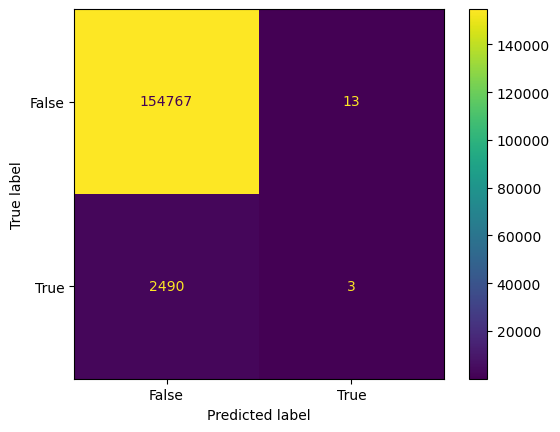



Accuracy:  0.9840849986965341
Precision:  0.1875
Recall:  0.0012033694344163659
F1:  0.0023913909924272616
AUC:  0.7297876812537308


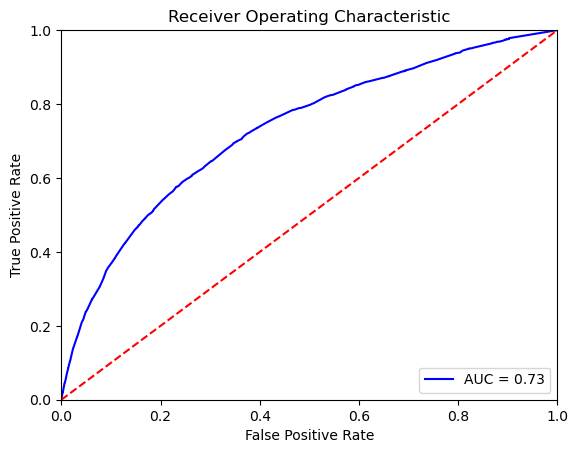

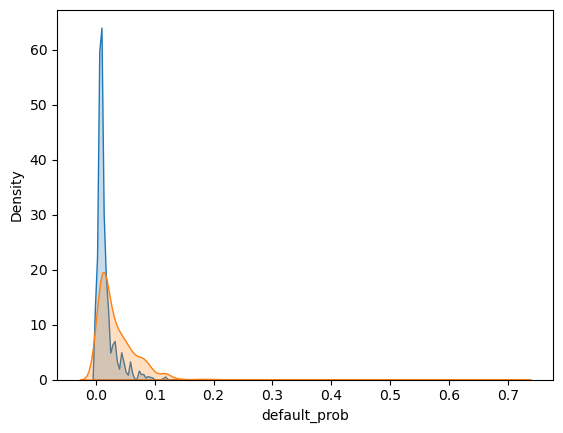

In [169]:
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)

eval_model(rfc_model, X_test, y_test)

In [175]:
from imblearn.over_sampling import SMOTE

In [177]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_smote.value_counts())

Before SMOTE: isFraud
False    619166
True       9924
Name: count, dtype: int64
After SMOTE: isFraud
False    619166
True     619166
Name: count, dtype: int64


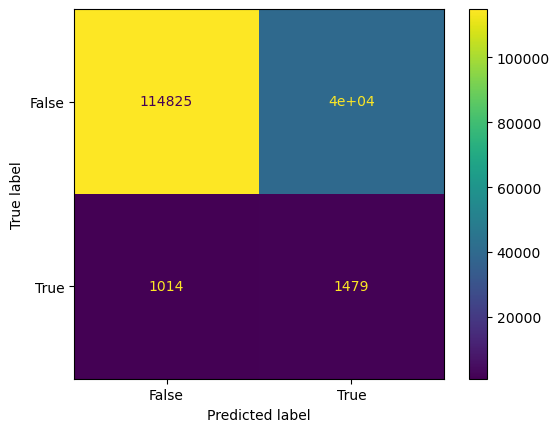



Accuracy:  0.739503919935399
Precision:  0.03569532268185548
Recall:  0.5932611311672683
F1:  0.06733899424044437
AUC:  0.7231821629312559


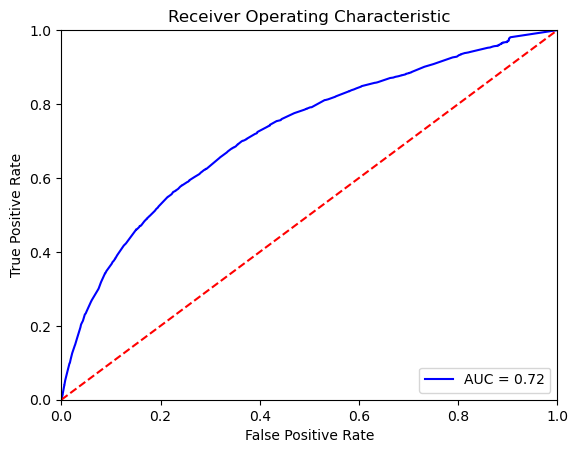

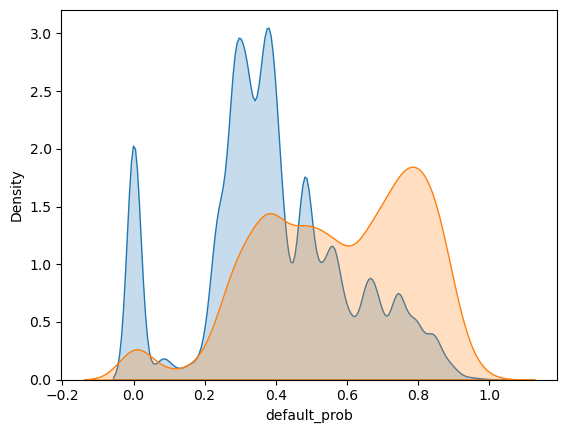

In [179]:
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train_smote, y_train_smote)

eval_model(rfc_model, X_test, y_test)

In [117]:
from sklearn.model_selection import GridSearchCV

In [137]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
#Initialize the model
rfc_model = RandomForestClassifier(random_state=42)
#Set up GridSearchCV
grid_search = GridSearchCV(estimator=rfc_model,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring='f1')
#Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


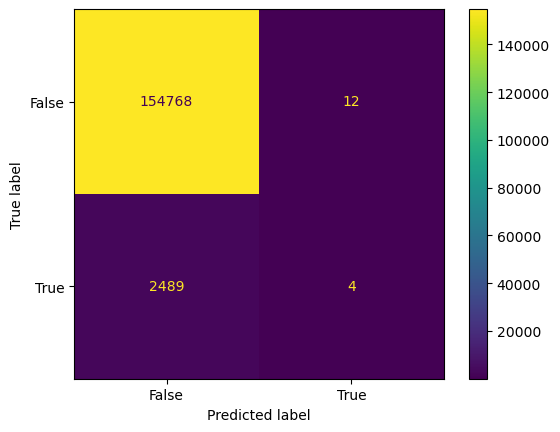



Accuracy:  0.9840977154374877
Precision:  0.25
Recall:  0.001604492579221821
F1:  0.0031885213232363493
AUC:  0.728769238452238


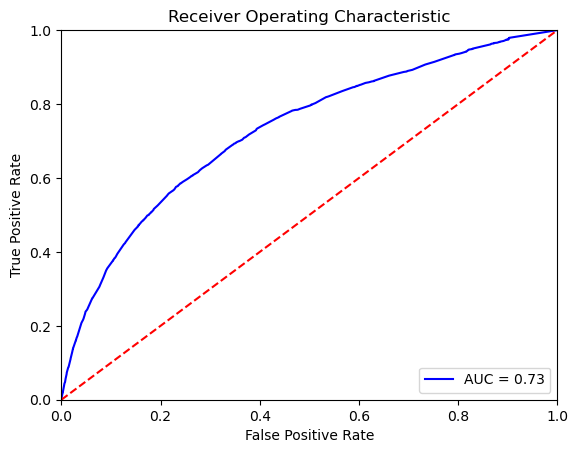

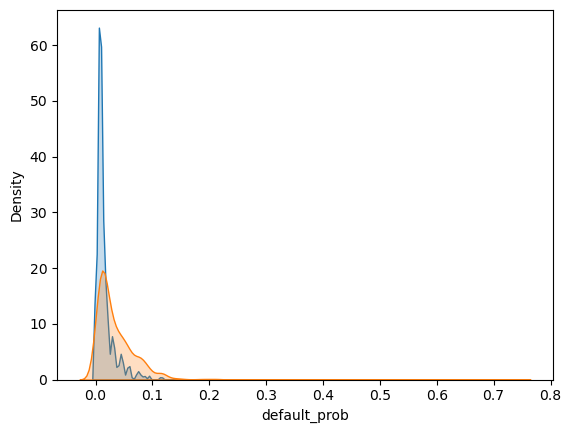

In [139]:
rfc_model = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300)
rfc_model.fit(X_train, y_train)

eval_model(rfc_model, X_test, y_test)

In [133]:
df[df['acqCountry']=='US']

,transactionAmount,acqCountry,merchantCountryCode,posEntryMode,merchantCategoryCode,cardPresent,expirationDateKeyInMatch,isFraud,isMatchedCVV,posConditionCode_08,posConditionCode_99,posConditionCode_UNKNOWN,transactionType_PURCHASE,transactionType_REVERSAL,transactionType_UNKNOWN


In [181]:
importance = rfc_model.feature_importances_

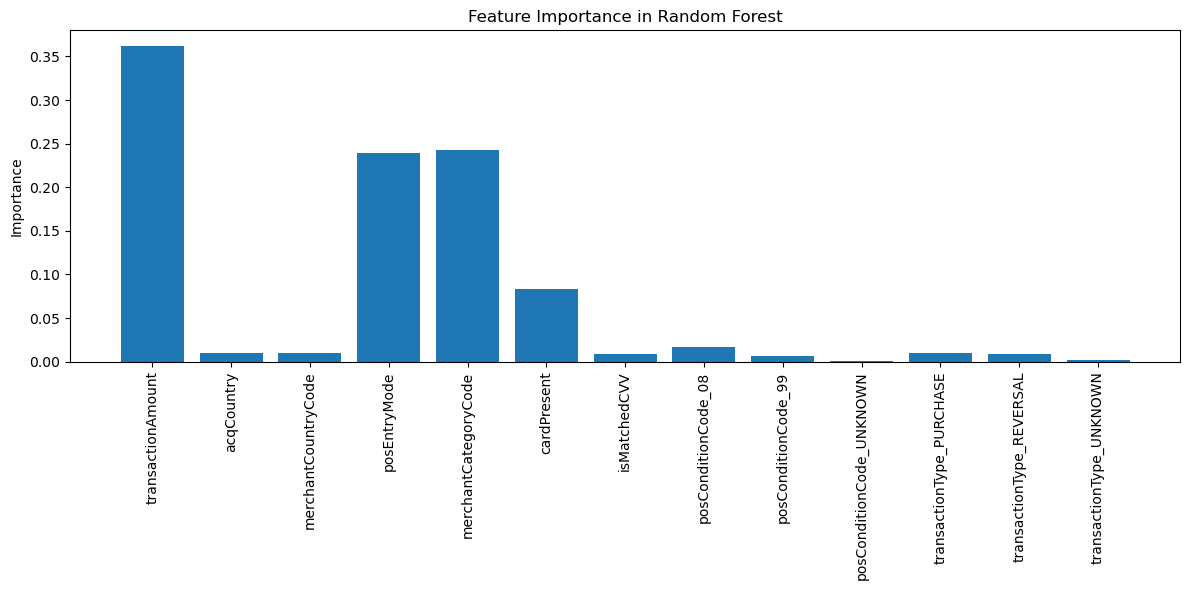

In [183]:
plt.figure(figsize=(12, 6))
plt.bar(range(X.shape[1]), importance)
plt.xticks(range(X.shape[1]), X.columns, rotation=90)  # Use encoded column names
plt.ylabel("Importance")
plt.title("Feature Importance in Random Forest")
plt.tight_layout()
plt.show()

In [185]:
import shap
shap.initjs()

In [187]:
explainer = shap.Explainer(rfc_model)
shap_values = explainer.shap_values(X_test)

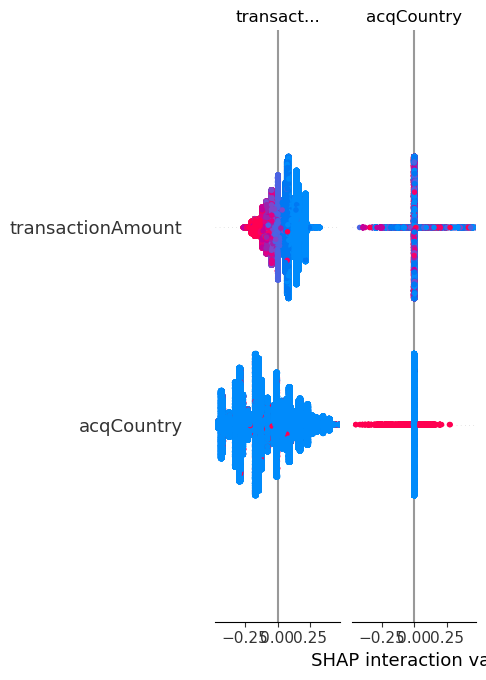

In [195]:
shap.summary_plot(shap_values, X_test, plot_type="bar")